In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import seaborn as sns
import datetime
import matplotlib.dates as mdates
mpl.rcParams['figure.dpi']= 300

In [244]:
pit_weather_cmp = pd.read_csv('pittsburgh_weather_tmy3_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
bj_weather_cmp = pd.read_csv('beijing_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
sh_weather_cmp = pd.read_csv('shanghai_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)
sg_weather_cmp = pd.read_csv('singapore_weather_iwec_2017_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [245]:
# The max min values are based on Beijing Data
weather_norm_max_min = [[37.4, 17.858333], [100, 0], [360, 0], 
                        [8.825, 0], [897.916667, 0], [460.75, 0]]

In [246]:
tmy3_weather_column_names = ['TMY3:OAT', 'TMY3:OARH',
                          'TMY3:WD', 'TMY3:WS', 'TMY3:DirSR',
                          'TMY3:DifSR', '2017:OAT', '2017:OARH',
                          '2017:WD', '2017:WS', '2017:DirSR',
                          '2017:DifSR']

iwec_weather_column_names = ['IWEC:OAT', 'IWEC:OARH',
                          'IWEC:WD', 'IWEC:WS', 'IWEC:DirSR',
                          'IWEC:DifSR', '2017:OAT', '2017:OARH',
                          '2017:WD', '2017:WS', '2017:DirSR',
                          '2017:DifSR']
pit_weather_cmp.columns = tmy3_weather_column_names
bj_weather_cmp.columns = iwec_weather_column_names
sh_weather_cmp.columns = iwec_weather_column_names
sg_weather_cmp.columns = iwec_weather_column_names


In [247]:
pit_weather_cmp = pit_weather_cmp.resample('H').mean()
bj_weather_cmp = bj_weather_cmp.resample('H').mean()
sh_weather_cmp = sh_weather_cmp.resample('H').mean()
sg_weather_cmp = sg_weather_cmp.resample('H').mean()

In [248]:
def get_weather_cmp_reconstruct(weather_cmp_raw):
    weather_cmp_raw_reconstruct = [[],[],[]]
    column_num = weather_cmp_raw.columns.size
    for column_i in range(int(column_num/2)):
        column_name = weather_cmp_raw.columns[column_i]
        weather_cmp_raw_values_tmy3 = weather_cmp_raw[column_name].values
        if 'SR' in column_name:
            weather_cmp_raw_values_tmy3 = weather_cmp_raw_values_tmy3[weather_cmp_raw_values_tmy3 > 0]
        weather_cmp_raw_values_max = weather_norm_max_min[column_i][0]
        weather_cmp_raw_values_min = weather_norm_max_min[column_i][1]
        weather_cmp_raw_values_tmy3 = ((weather_cmp_raw_values_tmy3 - weather_cmp_raw_values_min)/
                                  (weather_cmp_raw_values_max - weather_cmp_raw_values_min))
        entry_length = weather_cmp_raw_values_tmy3.size
        data_type_source = column_name.split(':')[0]
        data_type_type = column_name.split(':')[1]
        weather_cmp_raw_reconstruct[0].extend(weather_cmp_raw_values_tmy3.tolist())
        weather_cmp_raw_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
        weather_cmp_raw_reconstruct[2].extend([data_type_type for _ in range(entry_length)])

        column_name = weather_cmp_raw.columns[column_i + 6]
        weather_cmp_raw_values_2017 = weather_cmp_raw[column_name].values
        if 'SR' in column_name:
            weather_cmp_raw_values_2017 = weather_cmp_raw_values_2017[weather_cmp_raw_values_2017 > 0]
        weather_cmp_raw_values_2017 = ((weather_cmp_raw_values_2017 - weather_cmp_raw_values_min)/
                                  (weather_cmp_raw_values_max - weather_cmp_raw_values_min))
        entry_length = weather_cmp_raw_values_2017.size
        data_type_source = column_name.split(':')[0]
        data_type_type = column_name.split(':')[1]
        weather_cmp_raw_reconstruct[0].extend(weather_cmp_raw_values_2017.tolist())
        weather_cmp_raw_reconstruct[1].extend([data_type_source for _ in range(entry_length)])
        weather_cmp_raw_reconstruct[2].extend([data_type_type for _ in range(entry_length)])

    weather_cmp_raw_reconstruct = np.array(weather_cmp_raw_reconstruct).T
    weather_cmp_raw_reconstruct = pd.DataFrame(weather_cmp_raw_reconstruct, columns = ['Normalized Value', 'Data Source', 'Weather Parameters'])
    weather_cmp_raw_reconstruct[['Normalized Value']] = weather_cmp_raw_reconstruct[['Normalized Value']].apply(pd.to_numeric)
    return weather_cmp_raw_reconstruct

In [249]:
pit_weather_cmp_reconstruct = get_weather_cmp_reconstruct(pit_weather_cmp)
bj_weather_cmp_reconstruct = get_weather_cmp_reconstruct(bj_weather_cmp)
sh_weather_cmp_reconstruct = get_weather_cmp_reconstruct(sh_weather_cmp)
sg_weather_cmp_reconstruct = get_weather_cmp_reconstruct(sg_weather_cmp)


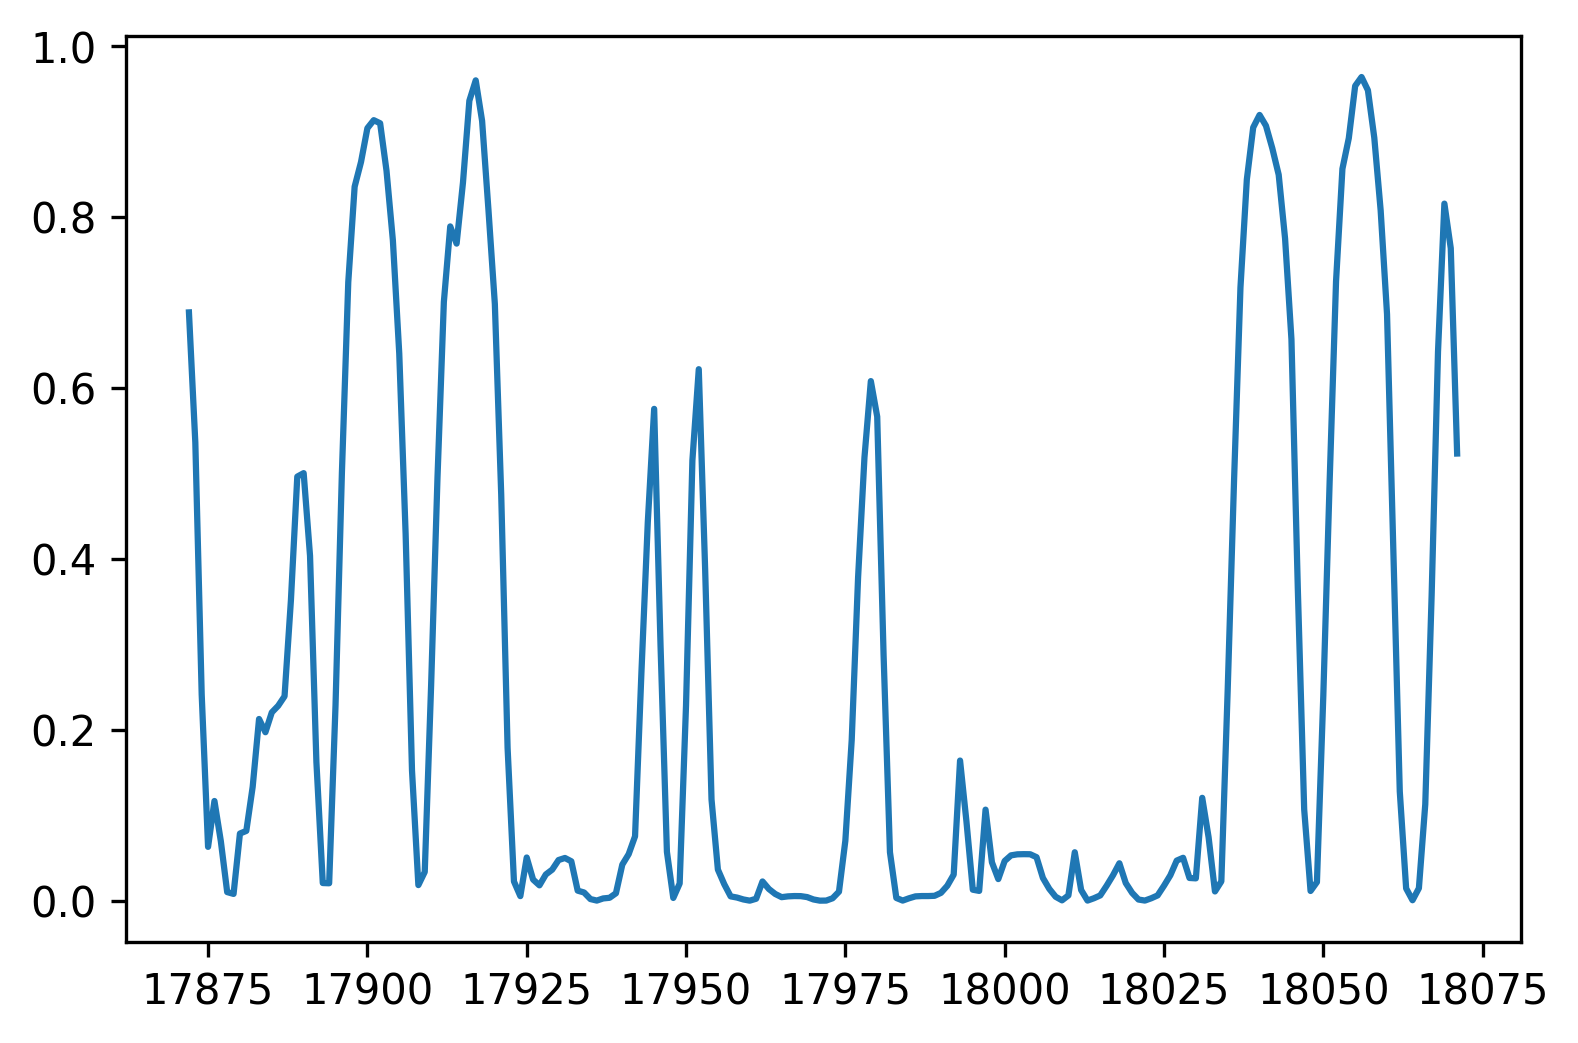

In [232]:
plt.plot(bj_weather_cmp_reconstruct[((bj_weather_cmp_reconstruct['Weather Parameters'] == 'DirSR') &
                                     (bj_weather_cmp_reconstruct['Data Source'] == 'IWEC'))]['Normalized Value'][200:400])

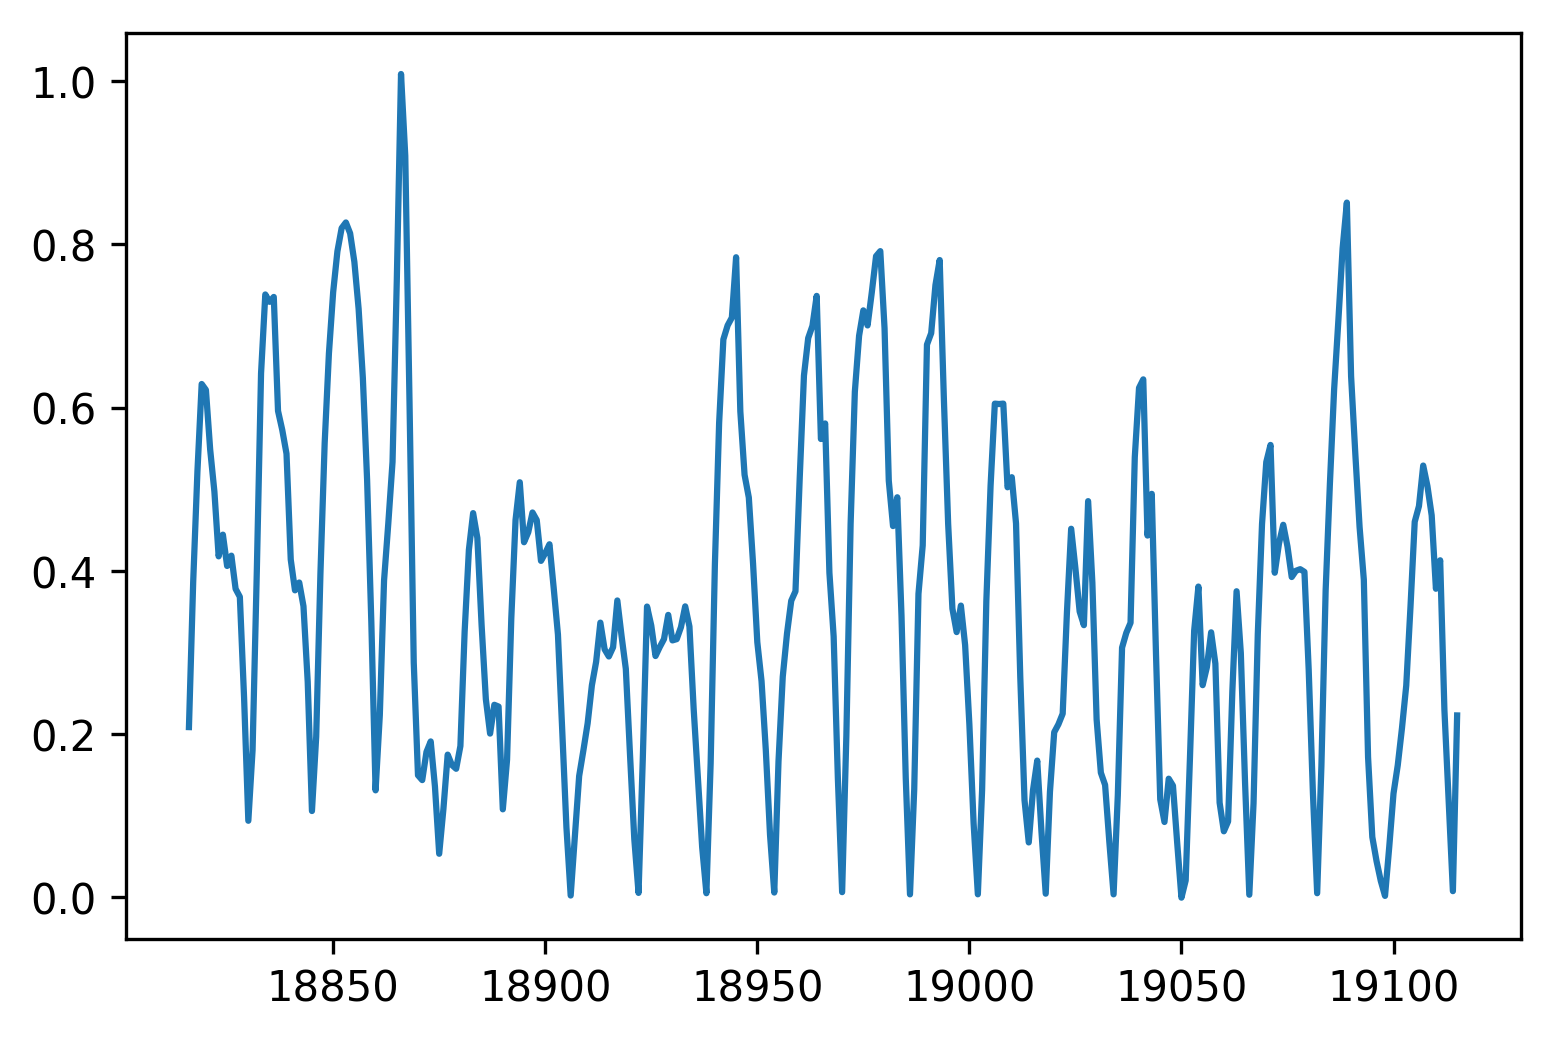

In [228]:
plt.plot(pit_weather_cmp_reconstruct[((pit_weather_cmp_reconstruct['Weather Parameters'] == 'DirSR') &
                                     (pit_weather_cmp_reconstruct['Data Source'] == '2017'))]['Normalized Value'][0:300])

In [169]:
pit_weather_cmp_reconstruct

,Normalized Value,Data Source,Weather Parameters
0,0.409091,TMY3,OAT
1,0.448295,TMY3,OAT
2,0.432576,TMY3,OAT
3,0.416477,TMY3,OAT
4,0.429924,TMY3,OAT
5,0.433712,TMY3,OAT
6,0.429924,TMY3,OAT
7,0.454545,TMY3,OAT
8,0.487879,TMY3,OAT
9,0.556439,TMY3,OAT


In [156]:
plt.plot(pit_weather_cmp_reconstruct['values'])

KeyError: 'values'

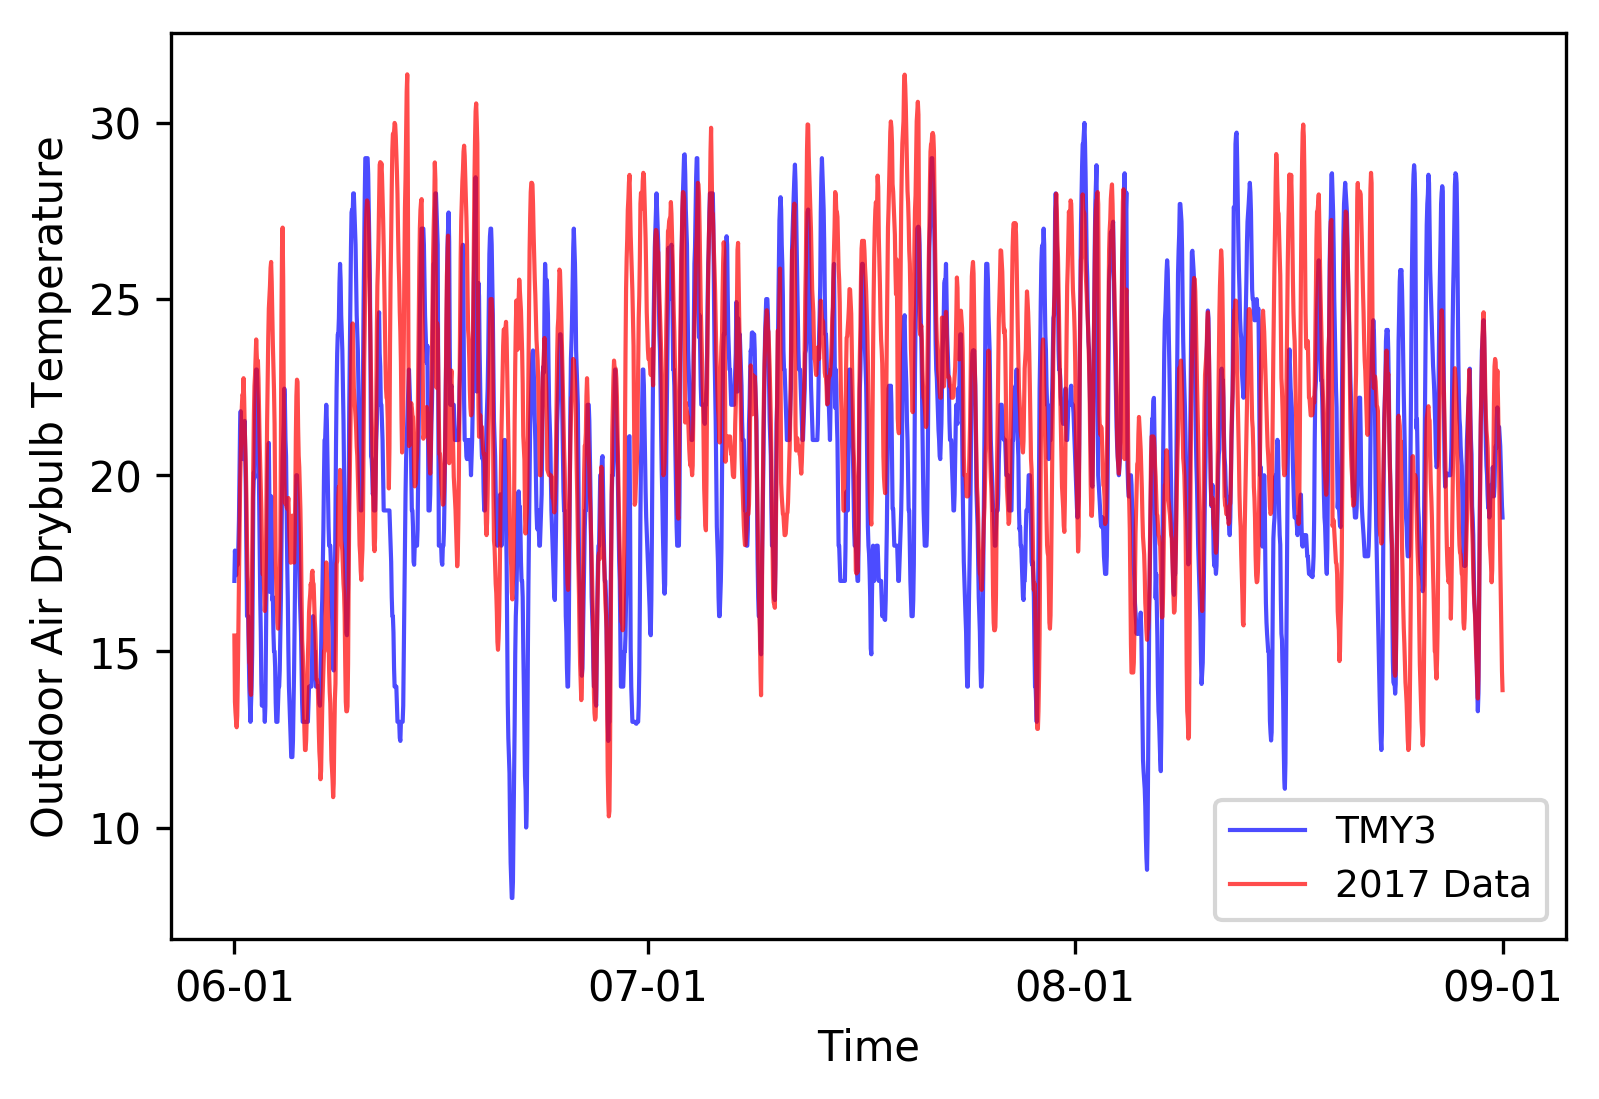

In [78]:
# OAT point-to-point cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(92)])
yearsFmt = mdates.DateFormatter('%m-%d')
months = mdates.MonthLocator()  # every month

plt.plot(pit_weather_cmp['TMY3:Outdoor Air Drybulb Temperature'], color = 'blue',
        label = 'TMY3', linewidth = 1, alpha=0.7)
plt.plot(pit_weather_cmp['2017:Outdoor Air Drybulb Temperature'], color = 'red',
        label = '2017 Data', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Outdoor Air Drybulb Temperature', fontsize = 10)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(months)

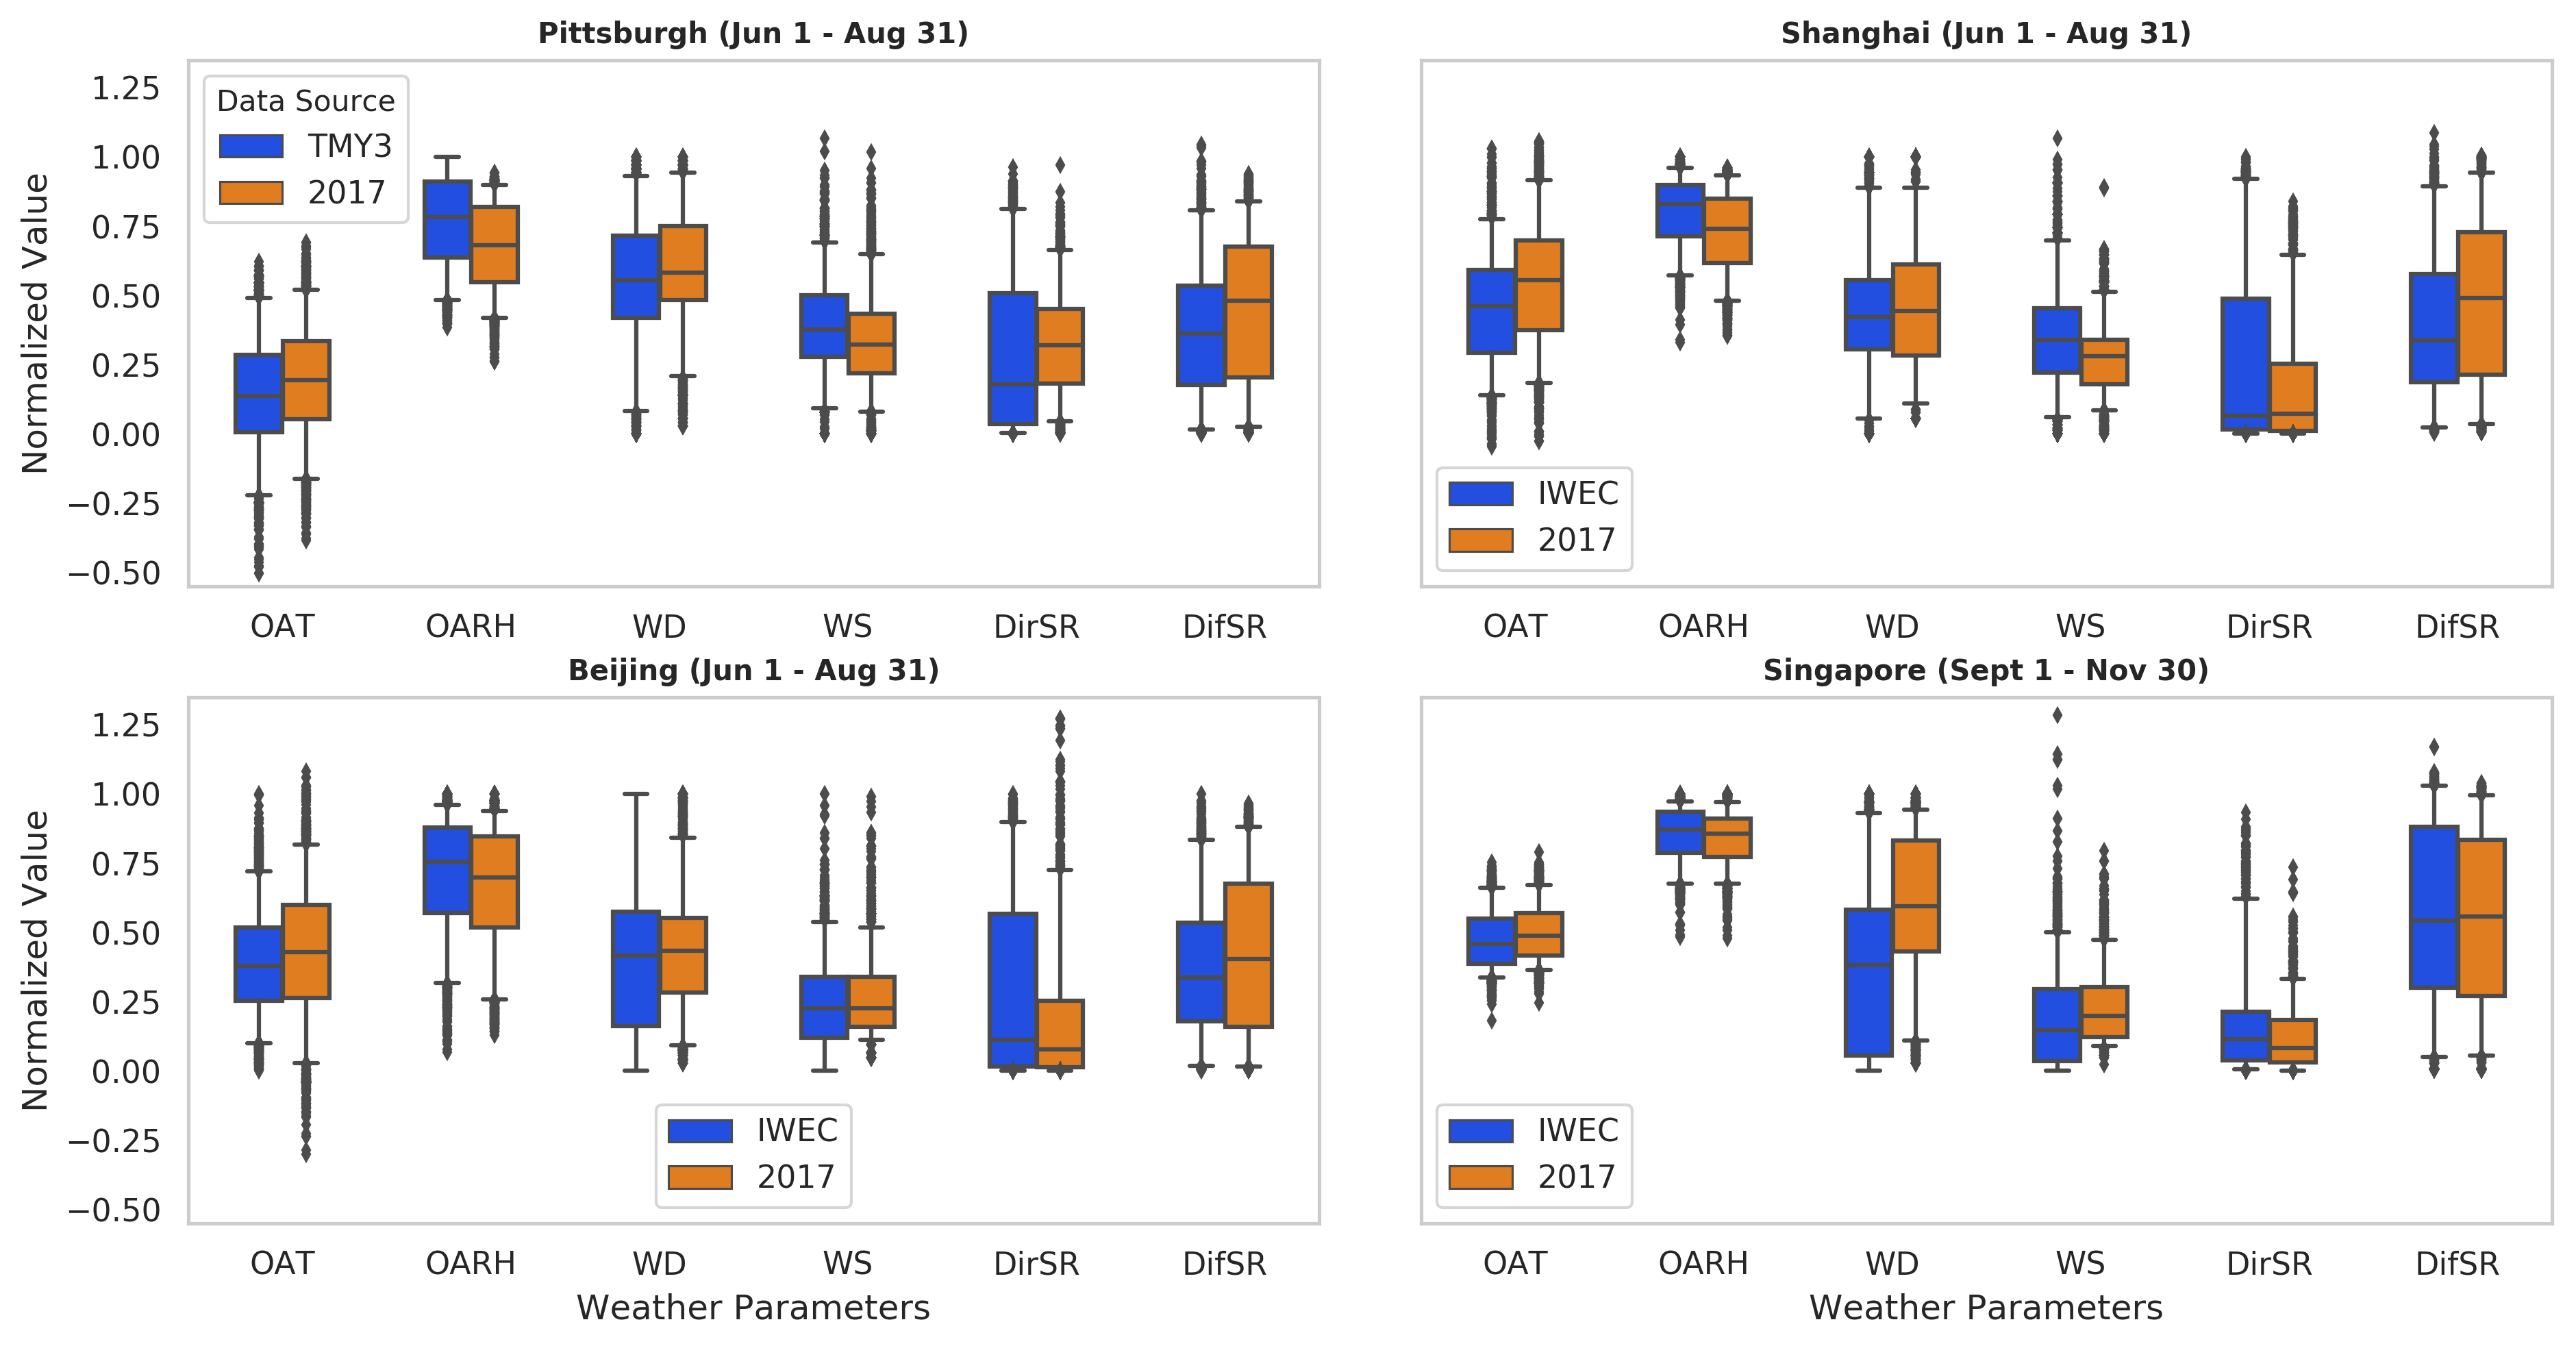

In [315]:
plt.figure(figsize=(12,6), facecolor='white')
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (0, 1))
ax4 = plt.subplot2grid((2, 2), (1, 1))
plt.tight_layout(pad=0.0, w_pad=0.0, h_pad=1.2)
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
# Weather Pit
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = pit_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax1)
ax1.set_title('Pittsburgh (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax1.set_ylim(-0.55, 1.35)
# Weather Bj
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = bj_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax2)
ax2.set_title('Beijing (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax2.set_ylim(-0.55, 1.35)
ax2.legend(loc = 'lower center')
# Weather Sh
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = sh_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax3)
ax3.set_title('Shanghai (Jun 1 - Aug 31)', fontsize = 10, fontweight='bold')
ax3.set_ylim(-0.55, 1.35)
ax3.legend(loc = 'lower left')

# Weather Sg
sns.boxplot(x = 'Weather Parameters', y = 'Normalized Value', hue = 'Data Source', data = sg_weather_cmp_reconstruct
            , palette = 'bright', width = 0.5, whis = [5, 95], fliersize = 3, ax = ax4)
ax4.set_title('Singapore (Sept 1 - Nov 30)', fontsize = 10, fontweight='bold')
ax4.set_ylim(-0.55, 1.35)
ax4.legend(loc = 'lower left')
# Remove some axises
ax1.get_xaxis().get_label().set_visible(False)
ax3.get_xaxis().get_label().set_visible(False)
ax3.set_yticklabels([])
ax3.get_yaxis().get_label().set_visible(False)
ax4.set_yticklabels([])
ax4.get_yaxis().get_label().set_visible(False)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
ax4.grid(False)

In [281]:
# Weather BJ
fig = plt.figure(figsize=(6, 4))



<Figure size 1800x1200 with 0 Axes>

(-0.55, 1.35)

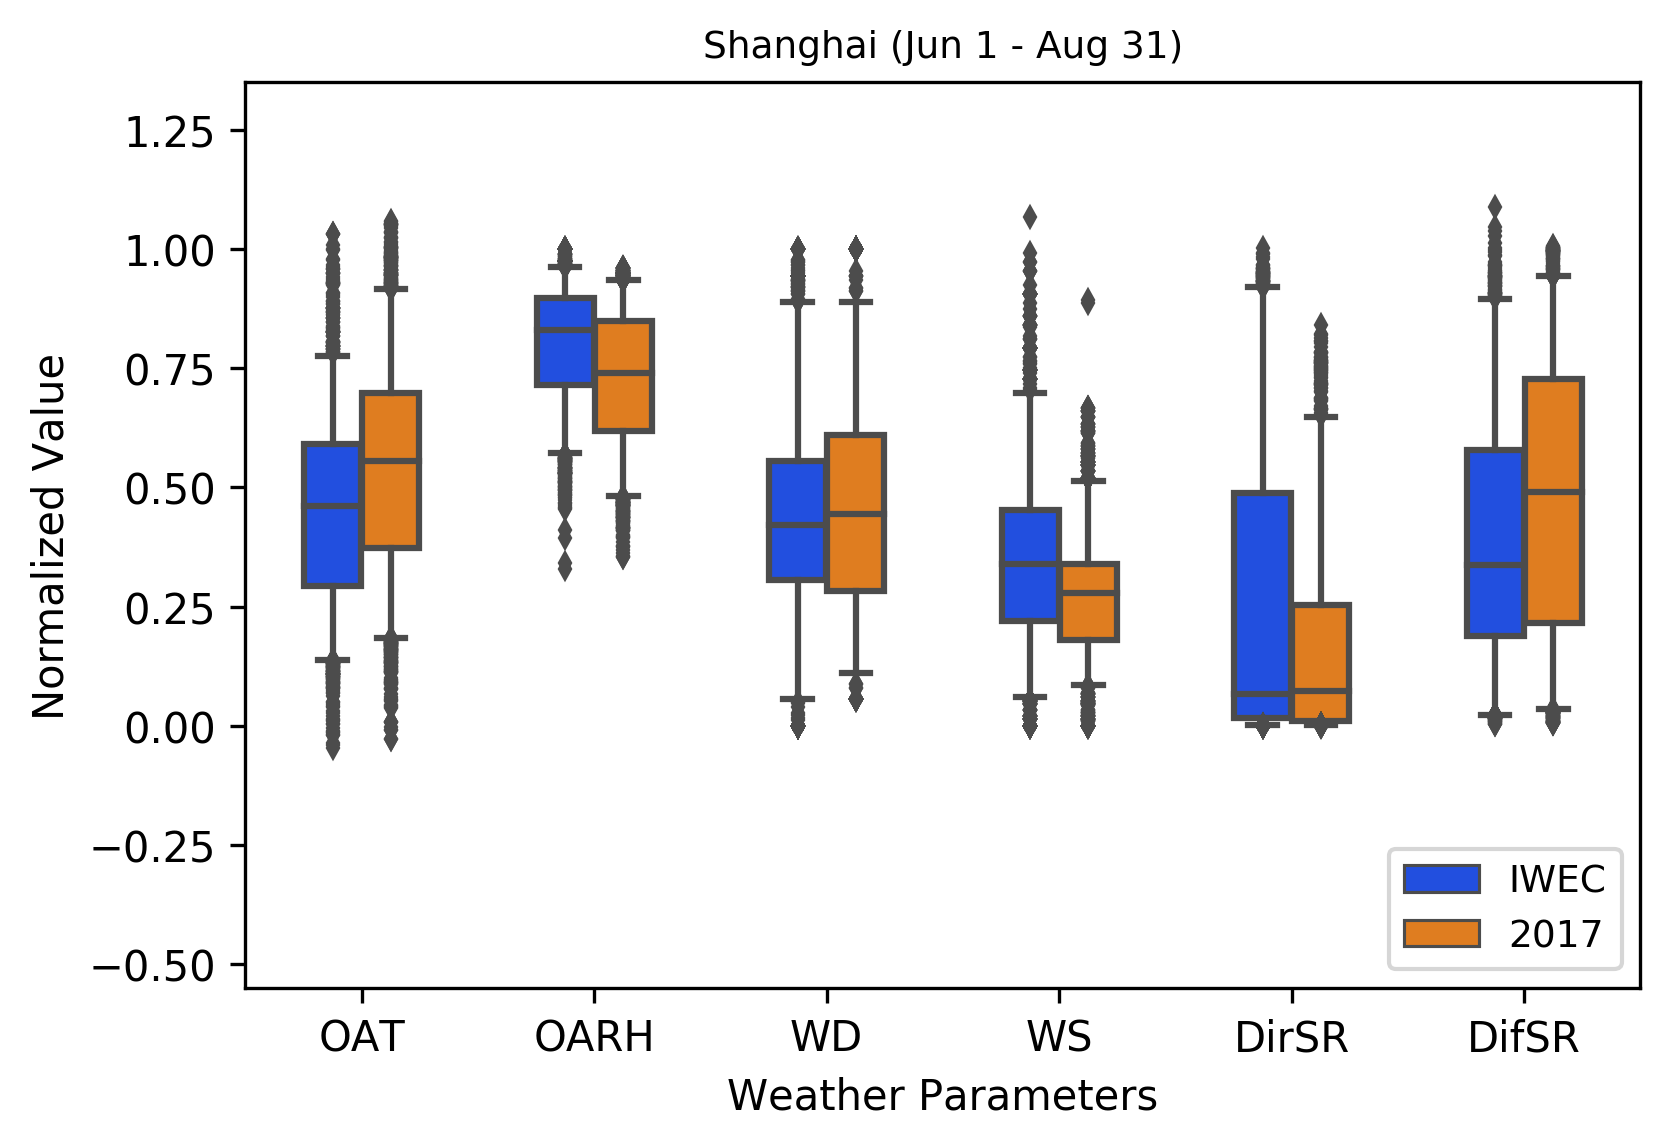

In [269]:
# Weather SH
fig = plt.figure(figsize=(6, 4))


(-0.55, 1.35)

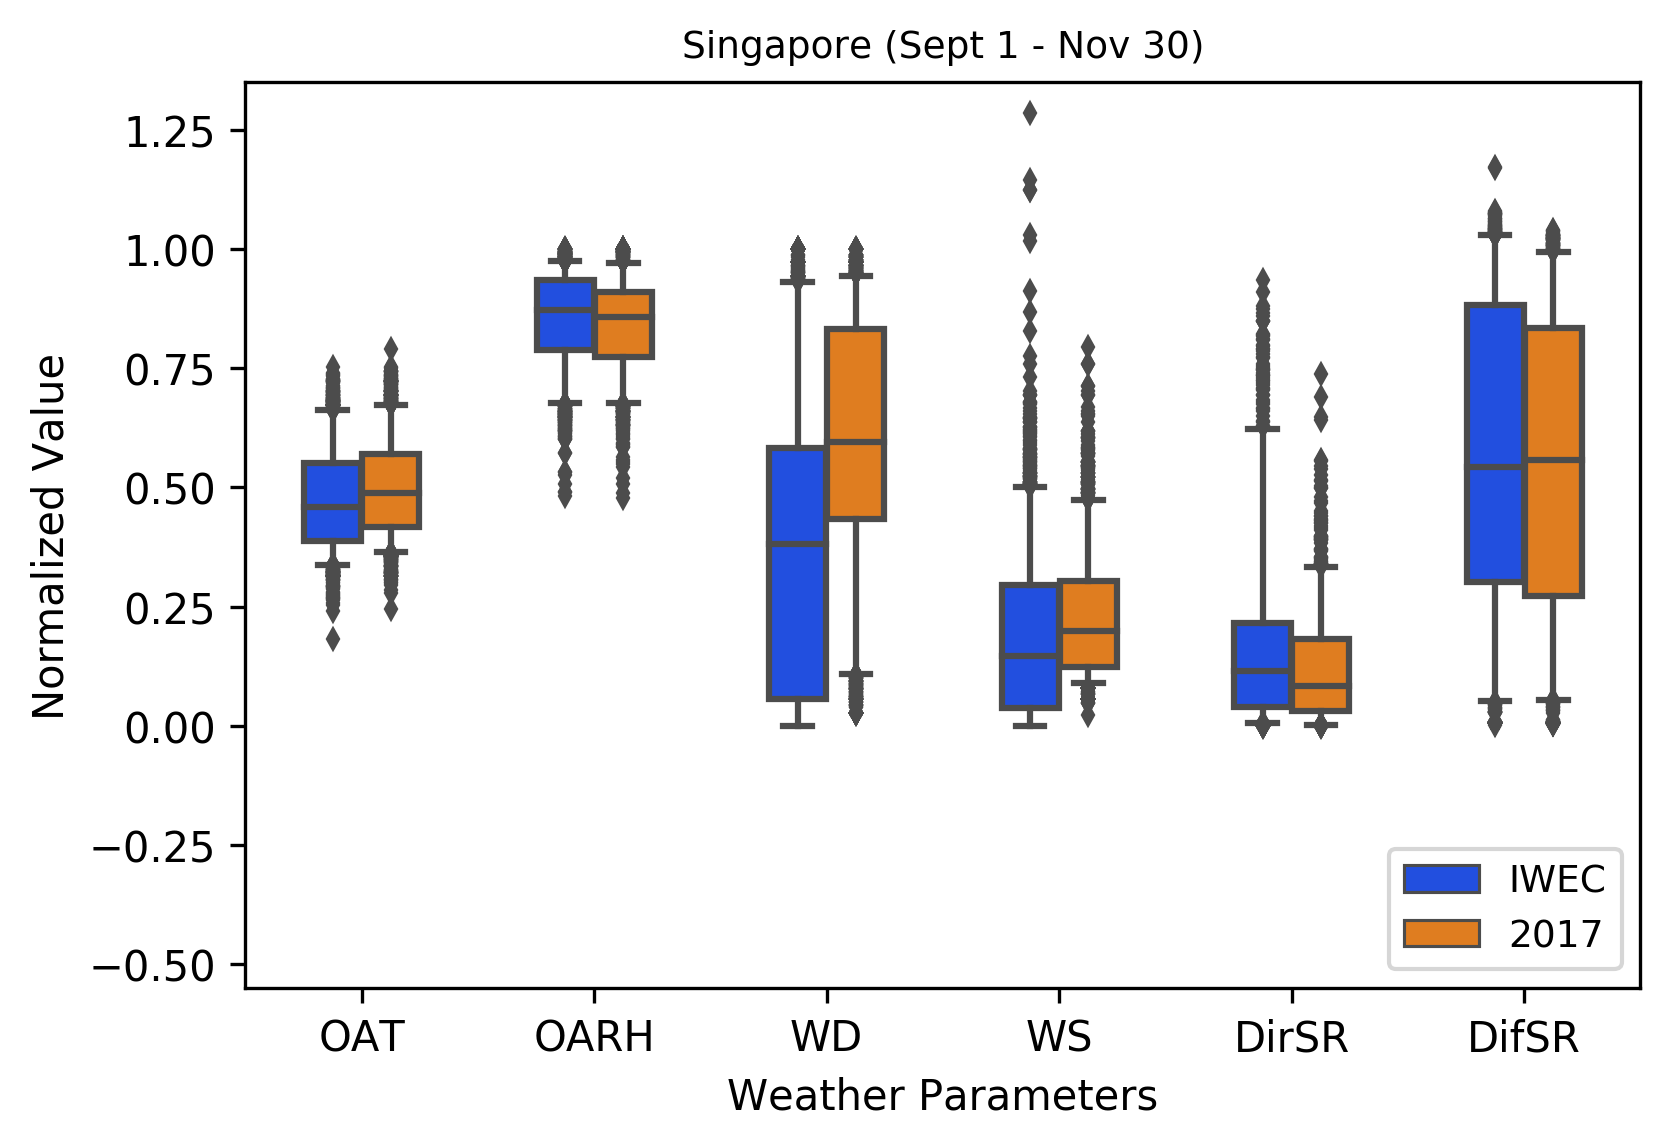

In [270]:
# Weather SG
fig = plt.figure(figsize=(6, 4))


In [142]:
model1_op_cmp = pd.read_csv('model1_operation_train_test_cmp.csv',
                             index_col = 0, skiprows = 3, header = 0, parse_dates = True)

In [143]:
model1_op_cmp

,[1] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[1] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW,[2] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW
Date/Time,,,,,,
2002-06-01 00:05:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:10:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:15:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:20:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:25:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:30:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:35:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:40:00,28,28.000000,0.0,0.0,37.462371,37.462371
2002-06-01 00:45:00,28,28.000000,0.0,0.0,37.462371,37.462371


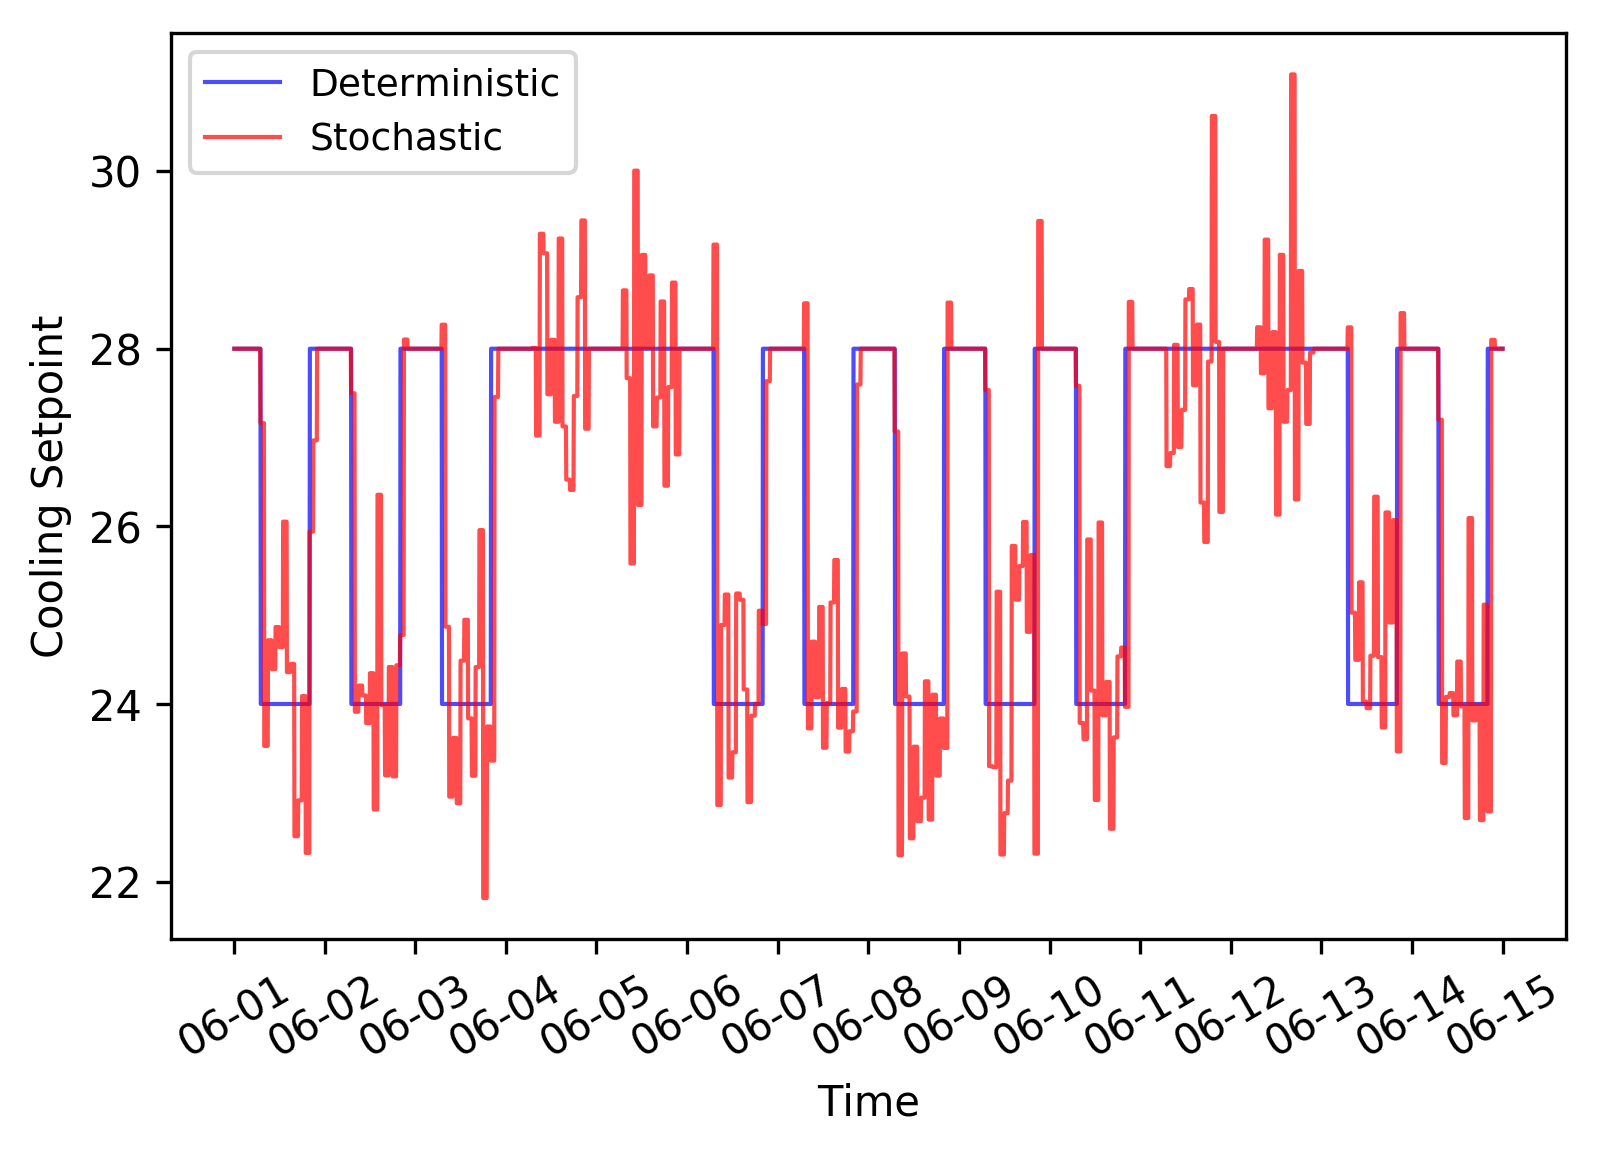

In [144]:
# Model1 cooling setpoint cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

plt.plot(model1_op_cmp['[1] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032],
         color = 'blue', label = 'Deterministic', linewidth = 1, alpha=0.7)
plt.plot(model1_op_cmp['[2] Zone Thermostat Cooling Setpoint Temperature (C) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032], 
         color = 'red', label = 'Stochastic', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Cooling Setpoint', fontsize = 10)
plt.xticks(rotation=30)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(days)

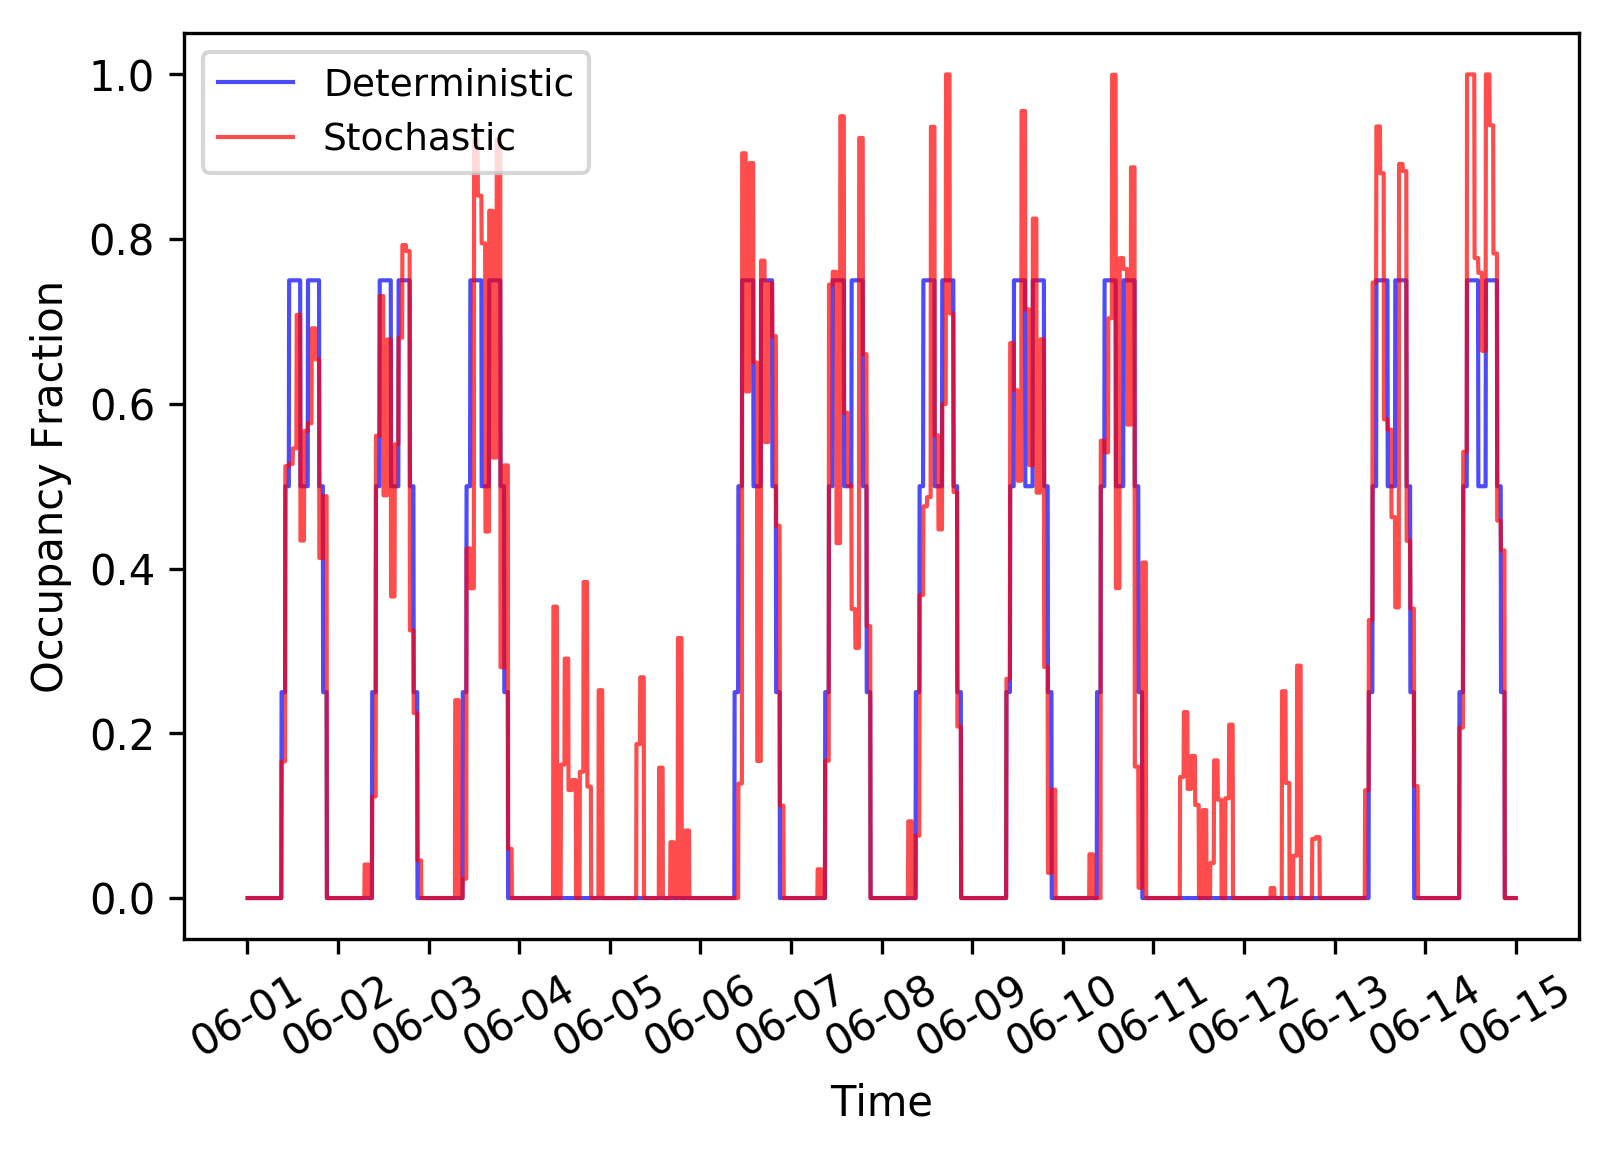

In [145]:
# Model1 occupancy sch cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

plt.plot(model1_op_cmp['[1] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/3,
         color = 'blue', label = 'Deterministic', linewidth = 1, alpha=0.7)
plt.plot(model1_op_cmp['[2] People Occupant Count () PEOPLE 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/3, 
         color = 'red', label = 'Stochastic', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Occupancy Fraction', fontsize = 10)
plt.xticks(rotation=30)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(days)

(-0.05, 1.05)

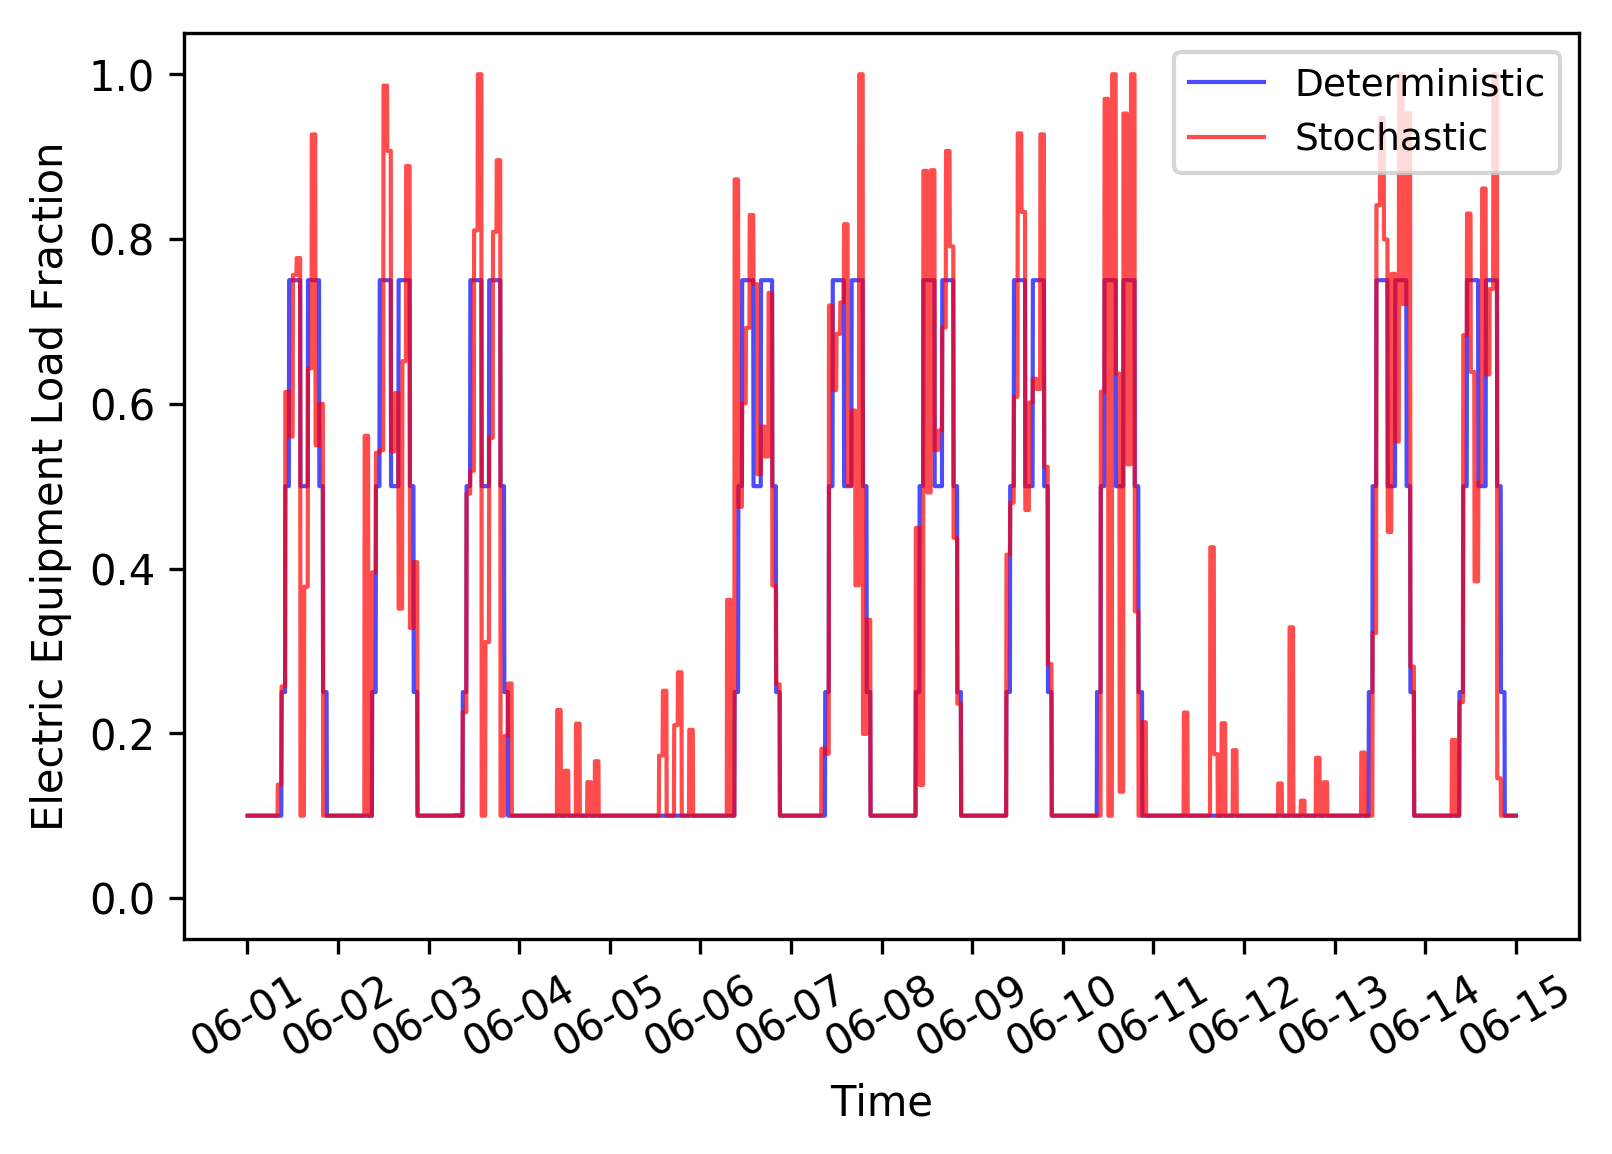

In [146]:
# Model1 electric equipment sch cmp
basetime = datetime.datetime.strptime('2012-06-01', '%Y-%m-%d').date()
x_plot = np.array([basetime + datetime.timedelta(days=i) for i in range(4032)])
yearsFmt = mdates.DateFormatter('%m-%d')
days = mdates.DayLocator(interval = 1)  # every month

plt.plot(model1_op_cmp['[1] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/374.55,
         color = 'blue', label = 'Deterministic', linewidth = 1, alpha=0.7)
plt.plot(model1_op_cmp['[2] Zone Electric Equipment Electric Power (W) 1ST%FLOOR:1ST%RESEARCH%OPEN%NW'][0: 4032]/374.55, 
         color = 'red', label = 'Stochastic', linewidth = 1, alpha=0.7)

plt.xlabel('Time', fontsize = 10)
plt.ylabel('Electric Equipment Load Fraction', fontsize = 10)
plt.xticks(rotation=30)
plt.legend(fontsize = 9, loc="best")
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_major_locator(days)
plt.ylim(-0.05, 1.05)